# Standardized Test Analysis

## Problem Statement

This project aims to identify the best- and worst-performing CA school districts on the ACT and SAT for 2019. The insights gleaned from this project will enable the state of California to not only direct resources to the districts in need, but also identify possible reasons for the disparities in performance.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

# These are the datasets I used
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`ca_county_income.xlsx`](./data/ca_county_income.xlsx): 2017 Median Household Income by County (Wikipedia)

### Outside Research

https://reason.org/commentary/california-school-spending-goes-up/

https://www.alec.org/article/increasing-education-spending-equal-higher-test-scores/

https://edsource.org/2017/how-does-california-rank-in-per-pupil-spending-it-all-depends/577405

https://www.latimes.com/politics/la-pol-ca-road-map-california-school-funding-shortfall-20190512-story.html


https://en.wikipedia.org/wiki/List_of_California_locations_by_income


Based on the above articles, there is some disagreement on whether or not increased spending on education actually benefits students (in the form of higher test scores). Additionally, I couldn't find easily accessible information on education spending by district/county, but education budgets come out of taxes, and I was able to find median household incomes for every county in California. Any further analysis is assuming a linear relationship between median income and education spending in a given county.

I want to see if I can show some correlation between average income and test performance.

In [1]:
import random as r

In [2]:
# Code:
def get_mean(arr):
    return sum(arr) / len(arr)

nums = [r.randint(0, 100) for i in range(10)]

In [3]:
nums

[76, 45, 58, 93, 97, 64, 85, 87, 54, 33]

In [4]:
get_mean(nums)

69.2

In [5]:
# Code:
def std_dev(arr):
    try:
        return ( sum([(i - get_mean(arr)) ** 2 for i in arr]) / (len(arr))) ** .5
    except TypeError:
        return 'n/a'
# I included the try/except logic to combat a TypeError I was seeing while
# trying to calculate standard deviation on columns with null values

In [6]:
std_dev(nums)

20.570853166555832

In [7]:
# Code:
def cleaner(string):
    return float(string[:-1]) / 100
cleaner('34.5%')

0.345

In [8]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import and Cleaning

Display the data

In [9]:
sat = pd.read_csv('../data/sat_2019_ca.csv', na_values=['*'])
sat.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN


Check for missing values.

In [10]:
sat.isna().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         858
PctERWBenchmark12         858
NumMathBenchmark12        858
PctMathBenchmark12        858
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         844
PctERWBenchmark11         844
NumMathBenchmark11        844
PctMathBenchmark11        844
TotNumBothBenchmark12     858
PctBothBenchmark12        858
TotNumBothBenchmark11     844
PctBothBenchmark11        844
Year                        1
Unnamed: 25              2580
dtype: int64

Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).

In [11]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      1722 non-null   float64
 11  PctERWBenchmark12      1722 non-null   float64
 12  NumMathBenchmark12     1722 non-null   float64
 13  PctMathBenchmark12     1722 non-null   float64
 14  Enroll11               2579 non-null   float64
 15  NumT

In [12]:
sat.describe().T

,count,mean,std,min,25%,50%,75%,max
CDS,2579.0,2.915139e+13,1.428328e+13,0.0,1.964725e+13,3.066597e+13,3.777103e+13,5.872770e+13
CCode,2579.0,2.851958e+01,1.425817e+01,0.0,1.900000e+01,3.000000e+01,3.700000e+01,5.800000e+01
CDCode,2579.0,2.915138e+06,1.428327e+06,0.0,1.964725e+06,3.066597e+06,3.777103e+06,5.872769e+06
SCode,2579.0,1.544913e+06,1.812049e+06,0.0,1.025080e+05,1.377860e+05,3.037422e+06,6.120893e+06
Enroll12,2579.0,7.481555e+02,1.009576e+04,0.0,6.300000e+01,1.710000e+02,4.620000e+02,4.896500e+05
NumTSTTakr12,2579.0,2.642741e+02,3.568205e+03,0.0,5.000000e+00,5.500000e+01,1.610000e+02,1.704110e+05
NumERWBenchmark12,1722.0,2.695401e+02,2.956948e+03,0.0,3.300000e+01,7.900000e+01,1.610000e+02,1.165000e+05
PctERWBenchmark12,1722.0,6.831844e+01,2.032934e+01,0.0,5.462250e+01,7.181000e+01,8.511000e+01,1.000000e+02
NumMathBenchmark12,1722.0,1.888595e+02,2.063413e+03,0.0,1.700000e+01,4.850000e+01,1.177500e+02,8.155100e+04
PctMathBenchmark12,1722.0,4.578354e+01,2.287735e+01,0.0,2.751250e+01,4.504000e+01,6.402250e+01,1.000000e+02


Fix any errors you identified in steps 2-3.

In [13]:
sat.drop(columns=['RType', 'Year', 'Unnamed: 25'], inplace=True)
sat.head()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11
0,6.615981e+12,6.0,661598.0,630046.0,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,...,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.616061e+12,6.0,661606.0,634758.0,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,...,26.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,...,219.0,174.0,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32
3,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,...,333.0,275.0,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73
4,1.964733e+13,19.0,1964733.0,1931856.0,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,...,17.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the testing benchmarks were the target data, and there was a large percentage of null values, I decided to drop all the nulls rather than replace them with an average. Since the school and district names weren't of the utmost importance, and I had a full set of the county information, I elected to keep the null state/district names.
Also, I had a full complement of school and district codes (that I could cross-reference), in case I wanted to see specific relationships.

In [14]:
sat.dropna(axis=0, subset=['NumERWBenchmark12'], inplace=True)
sat.dropna(axis=0, subset=['NumERWBenchmark11'], inplace=True)

sat.isna().sum()

CDS                        0
CCode                      0
CDCode                     0
SCode                      0
SName                    440
DName                     54
CName                      0
Enroll12                   0
NumTSTTakr12               0
NumERWBenchmark12          0
PctERWBenchmark12          0
NumMathBenchmark12         0
PctMathBenchmark12         0
Enroll11                   0
NumTSTTakr11               0
NumERWBenchmark11          0
PctERWBenchmark11          0
NumMathBenchmark11         0
PctMathBenchmark11         0
TotNumBothBenchmark12      0
PctBothBenchmark12         0
TotNumBothBenchmark11      0
PctBothBenchmark11         0
dtype: int64

In [15]:
sat.head()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11
2,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,...,219.0,174.0,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32
3,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,...,333.0,275.0,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73
5,1.964734e+13,19.0,1964733.0,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68.0,...,187.0,183.0,91.0,49.73,47.0,25.68,36.0,33.96,44.0,24.04
6,3.073635e+13,30.0,3073635.0,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161.0,...,503.0,223.0,206.0,92.38,176.0,78.92,132.0,69.47,172.0,77.13
9,1.964733e+13,19.0,1964733.0,119685.0,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,17.0,...,79.0,79.0,22.0,27.85,10.0,12.66,6.0,8.82,6.0,7.59


Display the data types of each feature.

In [16]:
sat.dtypes

CDS                      float64
CCode                    float64
CDCode                   float64
SCode                    float64
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12        float64
PctERWBenchmark12        float64
NumMathBenchmark12       float64
PctMathBenchmark12       float64
Enroll11                 float64
NumTSTTakr11             float64
NumERWBenchmark11        float64
PctERWBenchmark11        float64
NumMathBenchmark11       float64
PctMathBenchmark11       float64
TotNumBothBenchmark12    float64
PctBothBenchmark12       float64
TotNumBothBenchmark11    float64
PctBothBenchmark11       float64
dtype: object

Rename columns to lowercase with underscores

In [17]:
sat.rename(columns={
    'CDS': 'uid_code',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'SName': 'school_name',
    'DName': 'district_name',
    'CName': 'county_name',
    'Enroll12': 'enrolled_grade_12',
    'NumTSTTakr12': 'num_testers_grade_12',
    'PctERWBenchmark12': 'pct_erw_pass_12',
    'PctMathBenchmark12': 'pct_math_pass_12',
    'Enroll11': 'enrolled_grade_11',
    'NumTSTTakr11': 'num_testers_grade_11',
    'PctERWBenchmark11': 'pct_erw_pass_11',
    'PctMathBenchmark11': 'pct_math_pass_11',
    'PctBothBenchmark12': 'pct_both_pass_12',
    'PctBothBenchmark11': 'pct_both_pass_11'
}, inplace=True)

I elected to drop the benchmark numbers and work with just the benchmark percents.

In [18]:
sat.drop(columns=['NumERWBenchmark12', 'NumMathBenchmark12', 'NumERWBenchmark11', 
                  'NumMathBenchmark11', 'TotNumBothBenchmark12', 'TotNumBothBenchmark11'], inplace=True)


In [19]:
sat.to_csv('../data/cali_sat.csv', index=False)

This begins cleaning and EDA of the ACT data

In [20]:
df = pd.read_csv('../data/act_2019_ca.csv', na_values=['*'])

In [21]:
df.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23.0,22.0,22.0,23.0,34.0,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21.0,20.0,23.0,22.0,11.0,57.89,2018-19,NaN


Again, I decided to drop the incomplete testing data instead of substituting.

In [22]:
df.dropna(subset=['AvgScrRead'], inplace=True)
df.isna().sum()


CDS               0
CCode             0
CDCode            0
SCode           350
RType             0
SName           404
DName            54
CName             0
Enroll12          0
NumTstTakr        0
AvgScrRead        0
AvgScrEng         0
AvgScrMath        0
AvgScrSci         0
NumGE21           0
PctGE21           0
Year              0
Unnamed: 17    1421
dtype: int64

And again, I wanted to work with just the benchmark percents.

In [23]:
df.drop(columns=['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 
                 'AvgScrSci', 'NumGE21', 'Year', 'Unnamed: 17'], inplace=True)

df.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,PctGE21
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
13,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


In [24]:
df.drop(columns=['RType'], inplace=True)
df.head()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,PctGE21
3,4.369666e+13,43.0,4369666.0,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
4,1.964733e+13,19.0,1964733.0,1935121.0,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
5,1.976968e+13,19.0,1976968.0,109926.0,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
6,1.964733e+13,19.0,1964733.0,126615.0,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
13,1.965136e+13,19.0,1965136.0,1996321.0,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


In [25]:
df.rename(columns={
    'CDS': 'uid_code',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'SName': 'school_name',
    'DName': 'district_name',
    'CName': 'county_name',
    'Enroll12': 'num_enrolled_grade_12',
    'NumTstTakr': 'num_testers_grade_12',
    'PctGE21': 'pct_above_21_comp'
}, inplace=True)
df.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
3,4.369666e+13,43.0,4369666.0,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
4,1.964733e+13,19.0,1964733.0,1935121.0,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
5,1.976968e+13,19.0,1976968.0,109926.0,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
6,1.964733e+13,19.0,1964733.0,126615.0,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
13,1.965136e+13,19.0,1965136.0,1996321.0,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


In [26]:
df.to_csv('../data/cali_act.csv', index=False)

In [27]:
df = pd.read_csv('../data/cali_act.csv')
df.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
0,4.369666e+13,43.0,4369666.0,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
1,1.964733e+13,19.0,1964733.0,1935121.0,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
2,1.976968e+13,19.0,1976968.0,109926.0,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
3,1.964733e+13,19.0,1964733.0,126615.0,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
4,1.965136e+13,19.0,1965136.0,1996321.0,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**uid_code**|*float*|Cali ACT|A unique identifying code for each school, combining the county, district, and school codes.|
|**county_code**|*float*|Cali ACT|The county identifier|
|**district_code**|*float*|Cali ACT|The district identifier|  
|**school_code**|*float*|Cali ACT|The school identifier|
|**school_name**|*object*|Cali ACT|The name of the school. If the name is n/a, the record is from the district/county/state|
|**district_name**|*object*|Cali ACT|The name of the district. If the name is n/a, the record is from the county/state|
|**county_name**|*object*|Cali ACT|The name of the county.|
|**num_enrolled_grade_12**|*float*|Cali ACT|Number of students enrolled in grade 12|
|**num_testers_grade_12**|*float*|Cali ACT|Number of students in grade 12 who tested|
|**pct_above_21_comp**|*float*|Cali ACT|Percent of students who tested who achieved higher than a 21 composite score|
|**population**|*float*|Cali County Income|County population|
|**population_density**|*float*|Cali County Income|County population density|
|**median_household_income**|*float*|Cali County Income|County median household income|
|----------------------------|------|-------|----------------|
|**uid_code**|*float*|Cali SAT|A unique identifying code for each school, combining the county, district, and school codes.|
|**county_code**|*float*|Cali SAT|The county identifier|
|**district_code**|*float*|Cali SAT|The district identifier|  
|**school_code**|*float*|Cali SAT|The school identifier|
|**school_name**|*object*|Cali SAT|The name of the school. If the name is n/a, the record is from the district/county/state|
|**district_name**|*object*|Cali SAT|The name of the district. If the name is n/a, the record is from the county/state|
|**county_name**|*object*|Cali SAT|The name of the county.|
|**enrolled_grade_12**|*float*|Cali SAT|Number of students enrolled in grade 12|
|**num_testers_grade_12**|*float*|Cali SAT|Number of students in grade 12 who tested|
|**pct_erw_pass_12**|*float*|Cali SAT|Percent of students in grade 12 who took the SAT and achieved higher than 480 (College Board benchmark) in Evidence-based Reading and Writing|
|**pct_math_pass_12**|*float*|Cali SAT|Percent of students in grade 12 who took the SAT and achieved higher than 530 (College Board benchmark) in Math|
|**enrolled_grade_11**|*float*|Cali SAT|Number of students enrolled in grade 11|
|**num_testers_grade_11**|*float*|Cali SAT|Number of students in grade 11 who tested|
|**pct_erw_pass_11**|*float*|Cali SAT|Percent of students in grade 11 who took the SAT and achieved higher than 460 (College Board benchmark) in Evidence-based Reading and Writing|
|**pct_math_pass_11**|*float*|Cali SAT|Percent of students in grade 11 who took the SAT and achieved higher than 510 (College Board benchmark) in Math|
|**pct_both_pass_12**|*float*|Cali SAT|Percent of students grade 12 who passed both benchmarks (480 in ERW, 530 in Math)|
|**pct_both_pass_11**|*float*|Cali SAT|Percent of students grade 11 who passed both benchmarks (460 in ERW, 510 in Math)|
|**population**|*float*|Cali County Income|County population|
|**population_density**|*float*|Cali County Income|County population density|
|**median_household_income**|*float*|Cali County Income|County median household income|


Getting the standard deviation of relevant columns

In [28]:
df.describe().T.round(2)
act_nums = ['num_enrolled_grade_12', 'num_testers_grade_12', 'pct_above_21_comp']
# ^^^ the numeric columns for which I wanted the standard deviation

In [29]:
sd_act = {name: round(std_dev(df[name]),2) for name in df.columns if name in act_nums}
sd_act


{'num_enrolled_grade_12': 13574.53,
 'num_testers_grade_12': 2310.78,
 'pct_above_21_comp': 25.57}

In [30]:
df2 = pd.read_csv('../data/cali_sat.csv')
df2.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11
0,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,30.39,13.73,219.0,174.0,24.14,6.90,13.73,6.32
1,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,47.79,15.93,333.0,275.0,35.27,13.45,15.93,12.73
2,1.964734e+13,19.0,1964733.0,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,64.15,33.96,187.0,183.0,49.73,25.68,33.96,24.04
3,3.073635e+13,30.0,3073635.0,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,84.74,72.63,503.0,223.0,92.38,78.92,69.47,77.13
4,1.964733e+13,19.0,1964733.0,119685.0,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,25.00,8.82,79.0,79.0,27.85,12.66,8.82,7.59


In [31]:
sat_nums = [name for name in df2.columns[-10:]]
sd_sat = {name: round(std_dev(df2[name]),2) for name in df2.columns if name in sat_nums}
sd_sat

{'enrolled_grade_12': 12645.14,
 'num_testers_grade_12': 4468.34,
 'pct_erw_pass_12': 19.6,
 'pct_math_pass_12': 22.68,
 'enrolled_grade_11': 12265.11,
 'num_testers_grade_11': 5505.97,
 'pct_erw_pass_11': 20.88,
 'pct_math_pass_11': 26.16,
 'pct_both_pass_12': 22.72,
 'pct_both_pass_11': 26.36}

These are the top ten districts based on percentage of ACT testers achieving above a 21 composite score for 2019

In [32]:
top_districts_act = df.groupby(['district_name', 'county_name'])['pct_above_21_comp'].mean().sort_values(ascending=False)
top_districts_act.head(10)


district_name                          county_name
Lakeside Union Elementary              San Diego      100.000
Los Gatos-Saratoga Joint Union High    Santa Clara     96.170
Piedmont City Unified                  Alameda         96.065
Santa Cruz County Office of Education  Santa Cruz      95.830
La Canada Unified                      Los Angeles     94.200
Oak Park Unified                       Ventura         93.855
Davis Joint Unified                    Yolo            93.350
Sierra Sands Unified                   Kern            93.330
Fremont Union High                     Santa Clara     92.910
Irvine Unified                         Orange          91.674
Name: pct_above_21_comp, dtype: float64

These are the worst-performing ten districts based on percentage of ACT testers achieving above a 21 composite score for 2019

In [33]:
worst_districts_act = df.groupby(['district_name', 'county_name'])['pct_above_21_comp'].mean().sort_values(ascending=True)
worst_districts_act.head(10)

district_name                                                  county_name   
Golden Plains Unified                                          Fresno            0.00000
Reef-Sunset Unified                                            Kings             3.57000
Tulelake Basin Joint Unified                                   Modoc             6.67000
California School for the Deaf-Riverside (State Special Schl)  Riverside         7.69000
Washington Unified                                             Fresno            8.26000
Mendota Unified                                                Fresno            8.54000
Mojave Unified                                                 Kern              8.54500
Fontana Unified                                                San Bernardino    8.85875
SBE - Academia Avance Charter                                  Los Angeles       9.09000
California School for the Deaf-Fremont (State Special Schl)    Alameda           9.52000
Name: pct_above_21_comp, dtype: 

These are the top ten *counties* based on percentage of ACT testers achieving above a 21 composite score for 2019

In [34]:
top_counties_act = df.groupby(['county_name'])['pct_above_21_comp'].mean().sort_values(ascending=False)
top_counties_act.head(10)

county_name
Calaveras      85.173333
Mono           79.300000
Amador         78.970000
Tuolumne       78.260000
Marin          76.794545
Placer         75.232000
Shasta         74.837500
Nevada         74.695000
Trinity        73.330000
Santa Clara    70.945614
Name: pct_above_21_comp, dtype: float64

These are the worst-performing ten *counties* based on percentage of ACT testers achieving above a 21 composite score for 2019

In [35]:
worst_counties_act = df.groupby(['county_name'])['pct_above_21_comp'].mean().sort_values(ascending=True)
worst_counties_act.head(10)

county_name
Modoc       16.668000
Merced      30.820526
Kings       30.920000
Tehama      31.995714
Colusa      32.373333
Lake        33.543333
Glenn       34.656000
Fresno      34.744146
Tulare      35.955600
Monterey    38.968182
Name: pct_above_21_comp, dtype: float64

These are the top ten districts based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [36]:
top_districts_sat = df2.groupby(['district_name', 'county_name'])['pct_both_pass_12'].mean().sort_values(ascending=False)
top_districts_sat.head(10)


district_name                        county_name
La Canada Unified                    Los Angeles    91.760000
San Marino Unified                   Los Angeles    91.670000
Los Gatos-Saratoga Joint Union High  Santa Clara    91.430000
Palo Alto Unified                    Santa Clara    90.466667
Oak Park Unified                     Ventura        87.965000
Irvine Unified                       Orange         87.924000
South Pasadena Unified               Los Angeles    87.850000
Manhattan Beach Unified              Los Angeles    87.320000
Fremont Union High                   Santa Clara    86.930000
Davis Joint Unified                  Yolo           85.020000
Name: pct_both_pass_12, dtype: float64

These are the worst-performing ten districts based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [37]:
worst_districts_sat = df2.groupby(['district_name', 'county_name'])['pct_both_pass_12'].mean().sort_values(ascending=True)
worst_districts_sat.head(10)


district_name                            county_name
Golden Plains Unified                    Fresno          0.000000
Williams Unified                         Colusa          0.000000
Firebaugh-Las Deltas Unified             Fresno          5.950000
McFarland Unified                        Kern            9.090000
Cloverdale Unified                       Sonoma          9.520000
Washington Unified                       Fresno          9.760000
San Pasqual Valley Unified               Imperial       10.530000
Farmersville Unified                     Tulare         10.645000
Paramount Unified                        Los Angeles    10.916667
SBE - The School of Arts and Enterprise  Los Angeles    11.590000
Name: pct_both_pass_12, dtype: float64

These are the top ten *counties* based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [38]:
top_counties_sat = df2.groupby(['county_name'])['pct_both_pass_12'].mean().sort_values(ascending=False)
top_counties_sat.head(10)

county_name
Nevada             74.874000
Mariposa           72.220000
Marin              68.747273
Tuolumne           67.922000
El Dorado          67.452500
Calaveras          66.658000
Placer             65.351364
Plumas             64.710000
Amador             64.583333
San Luis Obispo    63.050714
Name: pct_both_pass_12, dtype: float64

These are the worst-performing ten *counties* based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [39]:
worst_counties_sat = df2.groupby(['county_name'])['pct_both_pass_12'].mean().sort_values(ascending=True)
worst_counties_sat.head(10)

county_name
Colusa          9.500000
Merced         25.836190
Glenn          26.331429
Fresno         31.194151
Madera         31.521538
Tulare         31.748276
Kings          34.207500
Imperial       34.858571
Los Angeles    35.219398
Monterey       35.273913
Name: pct_both_pass_12, dtype: float64

3 worst performing counties on the SAT (Colusa, Merced, Glenn counties):

In [40]:
df2.loc[(df2.county_name == 'Colusa') | (df2.county_name == 'Merced') | (df2.county_name == 'Glenn')].head(15)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11
42,2.465755e+13,24.0,2465755.0,2434207.0,Los Banos High,Los Banos Unified,Merced,303.0,95.0,65.26,37.89,304.0,80.0,68.75,38.75,35.79,33.75
48,2.465789e+13,24.0,2465789.0,127373.0,El Capitan High,Merced Union High,Merced,373.0,142.0,64.08,32.39,388.0,106.0,76.42,53.77,30.99,53.77
49,2.465789e+13,24.0,2465789.0,2435204.0,Merced High,Merced Union High,Merced,400.0,110.0,70.91,42.73,417.0,79.0,68.35,51.90,39.09,48.10
111,2.465789e+13,24.0,2465789.0,2433605.0,Livingston High,Merced Union High,Merced,291.0,91.0,62.64,34.07,325.0,82.0,68.29,36.59,32.97,34.15
115,6.616141e+12,6.0,661614.0,635250.0,Pierce High,Pierce Joint Unified,Colusa,103.0,21.0,52.38,14.29,103.0,38.0,68.42,44.74,14.29,44.74
254,2.475317e+13,24.0,2475317.0,2431203.0,Dos Palos High,Dos Palos Oro Loma Joint Unified,Merced,159.0,43.0,51.16,20.93,149.0,30.0,76.67,66.67,16.28,63.33
255,2.475366e+13,24.0,2475366.0,2430114.0,Delhi High,Delhi Unified,Merced,167.0,82.0,60.98,17.07,169.0,59.0,67.80,22.03,17.07,22.03
288,2.465789e+13,24.0,2465789.0,2430601.0,Atwater High,Merced Union High,Merced,474.0,119.0,56.30,28.57,417.0,88.0,71.59,46.59,26.05,44.32
440,6.616221e+12,6.0,661622.0,637504.0,Williams Junior/Senior High,Williams Unified,Colusa,78.0,29.0,37.93,3.45,89.0,32.0,59.38,37.50,0.00,31.25
484,2.465755e+13,24.0,2465755.0,120923.0,Pacheco High,Los Banos Unified,Merced,418.0,120.0,60.00,25.83,445.0,37.0,89.19,67.57,24.17,67.57


3 worst performing counties on the ACT (Modoc, Merced, Kings counties):

In [41]:
df.loc[(df.county_name == 'Modoc') | (df.county_name == 'Merced') | (df.county_name == 'Kings')].sort_values(by='county_name', ascending=False).head(15)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
1330,2.573593e+13,25.0,2573593.0,4737250.0,Tulelake High,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
827,2.573593e+13,25.0,2573593.0,NaN,NaN,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
826,2.573585e+13,25.0,2573585.0,NaN,NaN,Modoc Joint Unified,Modoc,57.0,40.0,25.00
651,2.500000e+13,25.0,0.0,0.0,NaN,NaN,Modoc,87.0,55.0,20.00
594,2.573585e+13,25.0,2573585.0,2535409.0,Modoc High,Modoc Joint Unified,Modoc,55.0,40.0,25.00
569,2.465789e+13,24.0,2465789.0,2435204.0,Merced High,Merced Union High,Merced,400.0,52.0,42.31
1085,2.465755e+13,24.0,2465755.0,120923.0,Pacheco High,Los Banos Unified,Merced,418.0,39.0,43.59
825,2.475366e+13,24.0,2475366.0,NaN,NaN,Delhi Unified,Merced,167.0,68.0,22.06
824,2.473619e+13,24.0,2473619.0,NaN,NaN,Gustine Unified,Merced,155.0,28.0,28.57
823,2.465789e+13,24.0,2465789.0,NaN,NaN,Merced Union High,Merced,2577.0,379.0,30.87


3 worst districts on the ACT (Golden Plains Unified, Reef-Sunset Unified, Tulelake Basin Joint Unified school districts):

In [42]:
df.loc[(df.district_name == 'Golden Plains Unified') | (df.district_name == 'Reef-Sunset Unified') | (df.district_name == 'Tulelake Basin Joint Unified')].sort_values(by='district_name', ascending=False)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
827,2.573593e+13,25.0,2573593.0,NaN,NaN,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
1330,2.573593e+13,25.0,2573593.0,4737250.0,Tulelake High,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
87,1.673932e+13,16.0,1673932.0,1630953.0,Avenal High,Reef-Sunset Unified,Kings,149.0,112.0,3.57
745,1.673932e+13,16.0,1673932.0,NaN,NaN,Reef-Sunset Unified,Kings,165.0,112.0,3.57
719,1.075234e+13,10.0,1075234.0,NaN,NaN,Golden Plains Unified,Fresno,125.0,19.0,0.00
1325,1.075234e+13,10.0,1075234.0,1037456.0,Tranquillity High,Golden Plains Unified,Fresno,120.0,19.0,0.00


3 worst districts on the SAT (Golden Plains Unified, Williams Unified, Firebaugh-Las Deltas Unified school districts):

In [43]:
df2.loc[(df2.district_name == 'Golden Plains Unified') | (df2.district_name == 'Williams Unified') | (df2.district_name == 'Firebaugh-Las Deltas Unified')].sort_values(by='district_name', ascending=False)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11
440,6.616221e+12,6.0,661622.0,637504.0,Williams Junior/Senior High,Williams Unified,Colusa,78.0,29.0,37.93,3.45,89.0,32.0,59.38,37.50,0.00,31.25
1475,6.616220e+12,6.0,661622.0,0.0,NaN,Williams Unified,Colusa,87.0,29.0,37.93,3.45,98.0,32.0,59.38,37.50,0.00,31.25
34,1.075234e+13,10.0,1075234.0,1037456.0,Tranquillity High,Golden Plains Unified,Fresno,120.0,27.0,37.04,0.00,105.0,104.0,18.27,0.96,0.00,0.96
1296,1.075234e+13,10.0,1075234.0,0.0,NaN,Golden Plains Unified,Fresno,125.0,27.0,37.04,0.00,109.0,104.0,18.27,0.96,0.00,0.96
360,1.073809e+13,10.0,1073809.0,1030121.0,Firebaugh High,Firebaugh-Las Deltas Unified,Fresno,167.0,84.0,47.62,7.14,155.0,53.0,64.15,20.75,5.95,18.87
1529,1.073809e+13,10.0,1073809.0,0.0,NaN,Firebaugh-Las Deltas Unified,Fresno,170.0,84.0,47.62,7.14,159.0,53.0,64.15,20.75,5.95,18.87


This is where I imported the income data from wikipedia

In [44]:
income = pd.read_excel('../data/ca_county_income.xlsx')


In [45]:
income.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)
income.head()

,county,population,population_density,median_household_income
0,NaN,NaN,NaN,NaN
1,Alameda,1559308.0,2109.8,73775.0
2,Alpine,1202.0,1.6,61343.0
3,Amador,37159.0,62.5,52964.0
4,Butte,221578.0,135.4,43165.0


In [46]:
income.dropna(inplace=True)
income.head()

,county,population,population_density,median_household_income
1,Alameda,1559308.0,2109.8,73775.0
2,Alpine,1202.0,1.6,61343.0
3,Amador,37159.0,62.5,52964.0
4,Butte,221578.0,135.4,43165.0
5,Calaveras,44921.0,44.0,54936.0


In [47]:
income.rename(columns={'county': 'county_name'}, inplace=True)
# I renamed the county column to match the county_name from my other dataframes to merge easier
income.head()

,county_name,population,population_density,median_household_income
1,Alameda,1559308.0,2109.8,73775.0
2,Alpine,1202.0,1.6,61343.0
3,Amador,37159.0,62.5,52964.0
4,Butte,221578.0,135.4,43165.0
5,Calaveras,44921.0,44.0,54936.0


In [48]:
df = pd.merge(df, income, on='county_name')


In [49]:
df2 = pd.merge(df2, income, on='county_name')
df2.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11,population,population_density,median_household_income
0,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,30.39,13.73,219.0,174.0,24.14,6.90,13.73,6.32,9974203.0,2457.9,55870.0
1,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,47.79,15.93,333.0,275.0,35.27,13.45,15.93,12.73,9974203.0,2457.9,55870.0
2,1.964734e+13,19.0,1964733.0,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,64.15,33.96,187.0,183.0,49.73,25.68,33.96,24.04,9974203.0,2457.9,55870.0
3,1.964733e+13,19.0,1964733.0,119685.0,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,25.00,8.82,79.0,79.0,27.85,12.66,8.82,7.59,9974203.0,2457.9,55870.0
4,1.964634e+13,19.0,1964634.0,1996586.0,Animo Inglewood Charter High,Inglewood Unified,Los Angeles,145.0,68.0,66.18,44.12,163.0,122.0,59.02,29.51,42.65,29.51,9974203.0,2457.9,55870.0


Visualizing realtionships in the data

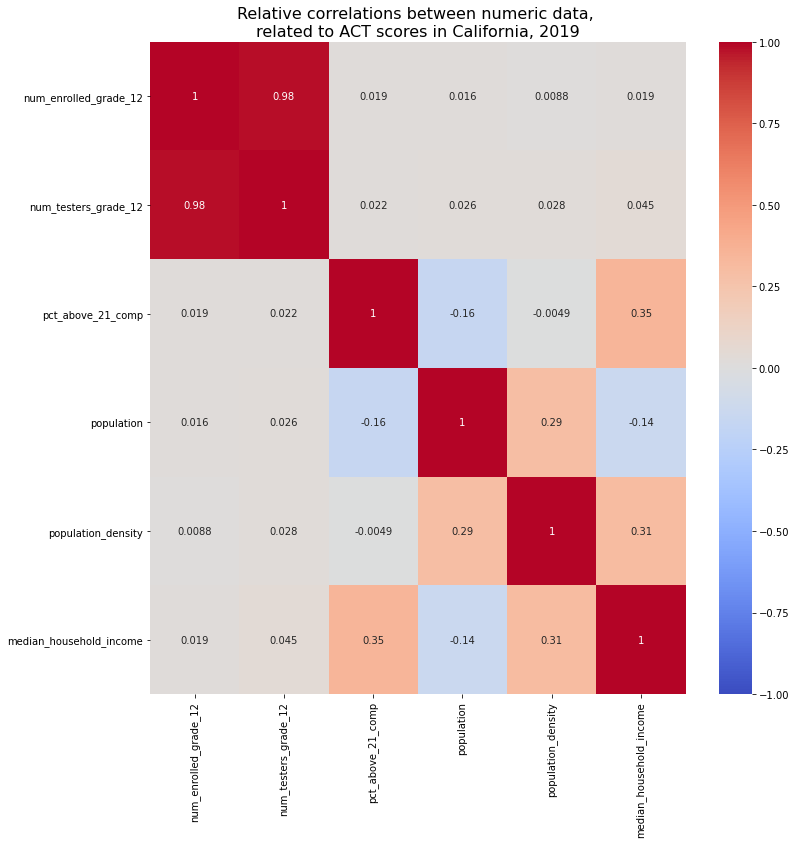

In [50]:
# Code
act_nums = df[['num_enrolled_grade_12', 'num_testers_grade_12', 'pct_above_21_comp', 'population', 'population_density', 'median_household_income']]
plt.figure(figsize=(12, 12))
sns.heatmap(act_nums.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1);
plt.title('''Relative correlations between numeric data, 
related to ACT scores in California, 2019''', size=16);

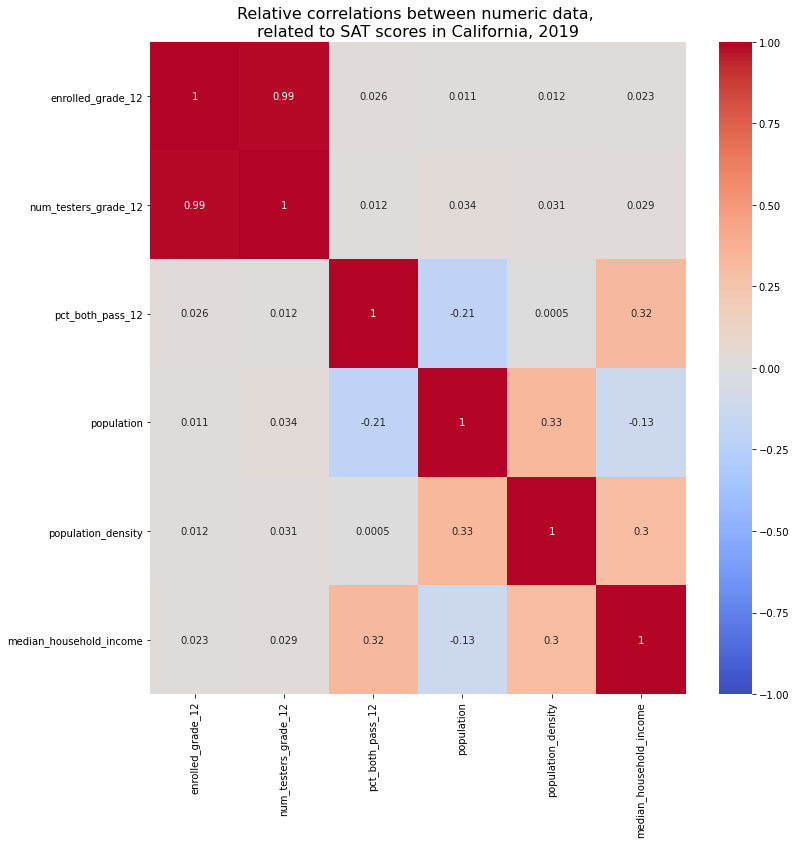

In [51]:
sat_nums = df2[[
    'enrolled_grade_12', 'num_testers_grade_12', 'pct_both_pass_12',
    'population', 'population_density', 'median_household_income'
]]
plt.figure(figsize=(12, 12))
sns.heatmap(sat_nums.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);
plt.title('''Relative correlations between numeric data, 
related to SAT scores in California, 2019''', size=16);

No clear correlations between numbers of students or test-takers and performance on either test

Highest correlation on both tests is with median household income per county at .35 for the ACT and .32 for the SAT

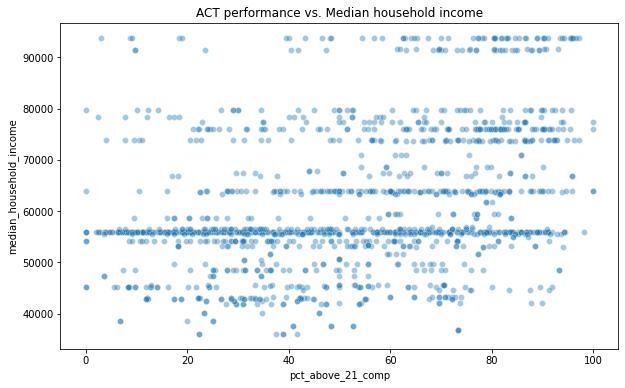

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='pct_above_21_comp', y='median_household_income', alpha=.4);
plt.title('ACT performance vs. Median household income');

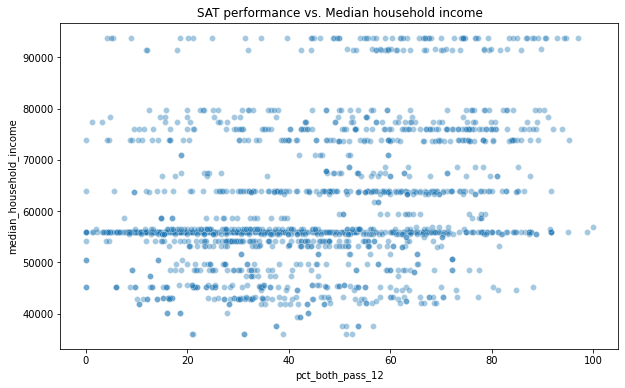

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='pct_both_pass_12', y='median_household_income', alpha=.4);
plt.title('SAT performance vs. Median household income');

We can see the ~.35 correlation between income and test performance in these two scatter plots. They are banded like that because of variations in performance at the district level, while the income data was by county. (Each county has a number of districts)

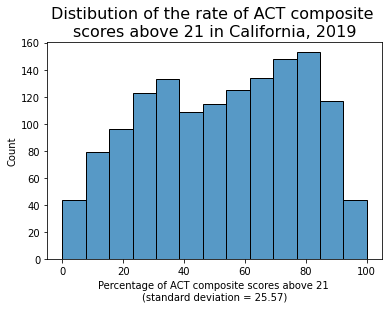

In [54]:
sns.histplot(df.pct_above_21_comp);
plt.title('''Distibution of the rate of ACT composite 
scores above 21 in California, 2019''', size=16);
plt.xlabel(f'''Percentage of ACT composite scores above 21 
(standard deviation = {sd_act['pct_above_21_comp']})''');

We see a bimodal distribution, skewed slightly left

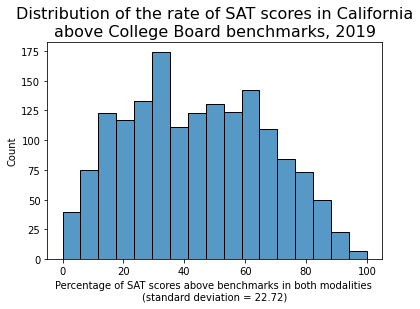

In [55]:
sns.histplot(df2.pct_both_pass_12)
plt.title('''Distribution of the rate of SAT scores in California
above College Board benchmarks, 2019''', size=16);
plt.xlabel(f'''Percentage of SAT scores above benchmarks in both modalities 
(standard deviation = {sd_sat['pct_both_pass_12']})''');

And here we see another bimodal distribution, this one skewed right slightly

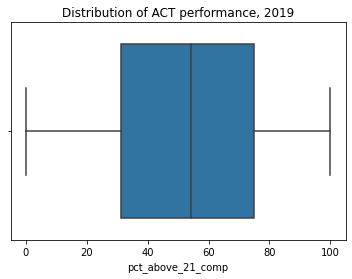

In [56]:
sns.boxplot(data=df, x='pct_above_21_comp')
plt.title('Distribution of ACT performance, 2019');

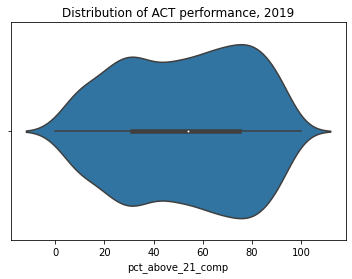

In [57]:
sns.violinplot(data=df, x='pct_above_21_comp');
plt.title('Distribution of ACT performance, 2019');


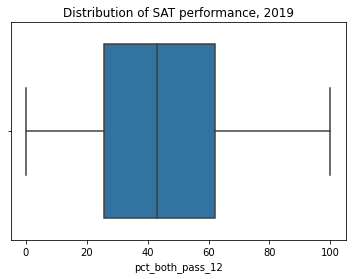

In [58]:
sns.boxplot(data=df2, x='pct_both_pass_12')
plt.title('Distribution of SAT performance, 2019');

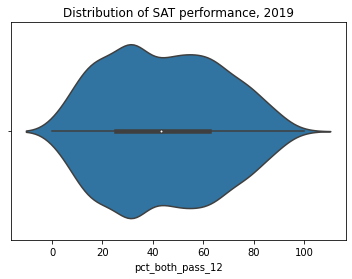

In [59]:
sns.violinplot(data=df2, x='pct_both_pass_12');
plt.title('Distribution of SAT performance, 2019');


Possibly clearer representations of the above histograms in boxplot/violinplot form. The same observations hold true. The violinplots are essentially a combination of the histogram and boxplots.

## Based on my exploration of the data, I can conclude the following:
-
The three worst-performing counties on the ACT: 

|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|
|Modoc|38,560|16.67|
|Merced|43,066|30.82|
|Kings|47,341|30.92|


The three worst-performing counties on the SAT: 

|**County**|**Median Income**|**Percent SAT scores over benchmarks**|
|-|-|-|
|Colusa|50,503|9.50|
|Merced|43,066|25.84|
|Glenn|40,106|26.33|


-
The three worst-performing districts on the ACT: 

|**District**|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|-|
|Golden Plains Unified|Fresno|45,201|0.00|
|Reef-Sunset Unified|Kings|47,341|3.57|
|Tulelake Basin Joint Unified|Modoc|38,560|6.67|


The three worst-performing districts on the SAT: 

|**District**|**County**|**Median Income**|**Percent SAT scores over benchmarks**|
|-|-|-|-|
|Golden Plains Unified|Fresno|45,201|0.00|
|Williams Unified|Colusa|50,503|0.00|
|Firebaugh-Las Deltas Unified|Fresno|45,201|5.95|


-
The three best-performing counties on the ACT: 

|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|
|Calaveras|54,936|85.17|
|Mono|61,814|79.30|
|Amador|52,964|78.97|


The three best-performing counties on the SAT: 

|**County**|**Median Income**|**Percent SAT scores over benchmark**|
|-|-|-|
|Nevada|56,949|74.87|
|Mariposa|50,560|72.22|
|Marin|91,529|68.74|


-
The three best-performing districts on the ACT: 

|**District**|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|-|
|Lakeside Union Elementary|San Diego|63,996|100.00|
|Los Gatos-Saratoga Joint Union High|Santa Clara|93,854|96.17|
|Piedmont City Unified|Alameda|73,775|96.06|


The three best-performing districts on the SAT:

|**District**|**County**|**Median Income**|**Percent SAT scores over benchmarks**|
|-|-|-|-|
|La Canada Unified|Los Angeles|55,870|91.76|
|San Marino Unified|Los Angeles|55,870|91.67|
|Los Gatos-Saratoga Joint Union High|Santa Clara|93,854|91.43|


Our analysis has identified the most and least successful counties and districts. We have discovered that there are no meaningful correlations with test success and any other data point, save household income. The correlation between median household income and success on these tests was (~34%).

Our recommendation to close the gap in test performance would be to either close the gap in education spending, or close the gap in median income. Without access to district-level spending data, we have to extrapolate from county income data what education spending looks like, which explains the uncertainty in our recommendation.